# Stock Predictions with Prophet 💰

Now that you have seen how `prophet` helps us do predictions, it's **your turn** to do **stock predictions**. 

In this challenge, we're looking at the stock closing prices of **Apple** (`AAPL`) starting from 2018-11. We're using data from a CSV file, so you can plug-in any stock data you want in the future. The data was gathered from [IEX](https://iexcloud.io/docs/api/).

Let's get started 💹

First, we import the necessary Python libraries. `pandas` for dealing with CSV files and data, and `prophet` for our predictions:

In [2]:
import pandas as pd
import numpy as np
from prophet import Prophet

The rest of the steps are essentially the same as with the car sales forecasting we just did 🚗

So make sure to check back in the `Monthly Car Sales with Prophet` notebook or the lecture slides on Learn if you forgot anything. We hide the solutions for this one, because we know you got this 💪

## Your turn! 🚀

**Create a DataFrame** called `df` by reading the `aapl.csv` file, which is in the `data` folder

In [3]:
# your code here
df = pd.read_csv('data/aapl.csv')
df

,close,date
0,53.060,2018-10-29
1,53.325,2018-10-30
2,54.715,2018-10-31
3,55.555,2018-11-01
4,51.870,2018-11-02
...,...,...
681,148.480,2021-07-15
682,146.390,2021-07-16
683,142.450,2021-07-19
684,146.150,2021-07-20


<details><summary>Solution</summary>
    
<pre>
df = pd.read_csv('data/aapl.csv')
df
</pre>
    
</details>


**Check** how many **rows and columns** do you have. Also check what are the **data types** of your columns

In [12]:
# number of rows and columns

In [13]:
# data types

<details><summary>Solution</summary>
    
<pre>
df.shape # to check how many rows and columns
df.dtypes # to check data types of columns
</pre>
    
</details>


### Preparing data for `prophet`

In the livecode we saw that `prophet` asks us to [format the data in a certain way](https://facebook.github.io/prophet/docs/quick_start.html) to make it work.

**Change the columns** to `y` and `ds`, in this order. `y` is our stock price (our target to predict), `ds` is the date.

In [5]:
# your code here

<details><summary>Solution</summary>
    
<pre>
df.columns = ['y', 'ds']
df # to check
</pre>
    
</details>


**Convert the `ds` column** to a `datetime` data type. Remember the [pandas.to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) function

In [6]:
# your code here

<details><summary>Solution</summary>
    
<pre>
df['ds'] = pd.to_datetime(df['ds'])
df.dtypes # to check
</pre>
    
</details>


**Visualize** the data that we have. We don't want to start making predictions before looking at the past :)

In [ ]:
# your code here

<details><summary>Solution</summary>
    
<pre>
df.plot(x='ds', y='y', figsize=(15,6), label='AAPL')
</pre>
    
</details>


**Finally** let's create a new `model` and `fit` (train) it on our DataFrame 🤖

In [8]:
# your code here

<details><summary>Solution</summary>
    
<pre>
model = Prophet()
model.fit(df)
</pre>
    
</details>


## In-sample prediction

Let's start with looking at existing data and see how well the model learned the patterns.

**Make a `sample`** with the last `90 days` of stock prices from our DataFrame `df`

In [10]:
# your code here

<details><summary>Solution</summary>
    
<pre>
sample = df[-90:] # counting 90 from the end of the dataframe

# OR

sample = df[595:686] # manually looking at the indexes

# Then, to check, see what's inside 'sample'

sample
</pre>
    
</details>


**Create a `forecast`** by using the `.predict()` method of our `model`

In [12]:
# your code here

<details><summary>Solution</summary>
    
<pre>
forecast = model.predict(sample)
forecast # to check
</pre>
    
</details>


We can look inside the `forecast` variable, but it's not easy to read. Let's **visualize** our forecast instead.

In [ ]:
# your code here

<details><summary>Solution</summary>
    
<pre>
model.plot(forecast); # don't forget the ';' to avoid duplication
</pre>
    
</details>


**[Bonus 🏋️‍♂️]** Let's also **plot a line** of the real historic data between the dots. Don't hesitate to check how we did that with the car sales challenge.

In [33]:
# your code here

<details><summary>Solution</summary>
    
<pre>
ax = model.plot(forecast).gca()
df.plot(ax=ax, x='ds', y='y', label='actual', color='g')
</pre>
    
</details>


**Finally, let's count the difference** between the `y` column in our `sample` and the `yhat` column in our `forecast`

In [16]:
# your code here

<details><summary>Solution</summary>
    
<pre>
difference = forecast['yhat'].values - sample['y'].values
np.absolute(difference).mean() # we need the absolute average, because our predictions can high or low
</pre>
    
</details>


We can see our predictions are very close - on average just about 25 cents off! Now let's move on to **future predictions** 🔮

## Out-of-sample prediction

**First, let's create a `future` DataFrame** which will contain dates for the next 180 days.

In the previous challenge we had to set our `freq`uency to `MS`, because our car sales were monthly. The only difference here, is that we need to change the `freq` option to `D`, for 'days'.

In [39]:
# your code here

<details><summary>Solution</summary>
    
<pre>
future = model.make_future_dataframe(freq='D', periods=90)
future
</pre>
    
</details>


**[But wait ❗]** The stock exchange is **closed on the weekends**, so if we want to be more accurate, we should also remove weekends from our `future` dates. For that we need to do some filtering using the [`pandas.datetime.dayofweek`](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.dayofweek.html) function. Simply run the cell below, to update your `future` DataFrame 😉

In [ ]:
future = future[future['ds'].dt.dayofweek < 5]
future.tail(10) # last 10 rows, note the weekend gaps

**Time to make a `future_forecast`** using the `.predict()` method of our `model`

In [52]:
# Your code here

<details><summary>Solution</summary>
    
<pre>
future_forecast = model.predict(future)
future_forecast.tail() # last 5 rows
</pre>
    
</details>


Again, looking at this huge DataFrame is not ideal - let's **visualize our predictions**

In [56]:
# Your code here

<details><summary>Solution</summary>
    
<pre>
model.plot(future_forecast);
</pre>
    
</details>


Interesting results! We can clearly see there's a point where our model starts "losing confidence". Let's explore our findings further.

## Exploring our Prediction

Let's start by looking at the different **components** of our time series prediction - such as **seasonality** and **trend**. Don't hesitate to check the car sales notebook for the answers!

In [59]:
# Your code here

<details><summary>Solution</summary>
    
<pre>
model.plot_components(future_forecast);
</pre>
    
</details>


Any day traders here? 🙋‍♂️ 🙋‍♀️ Because our data is daily, you can also see the **weekday trends**.

**[Bonus 🏋️‍♂️]** Shall we make our graph interactive? Remember the `.plot_plotly()` function we used in our car sales livecode.

In [61]:
# Your code here

<details><summary>Solution</summary>
    
<pre>
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, future_forecast)
</pre>
    
</details>


## Evaluating our Model

Let's use the [Diagnostics](https://facebook.github.io/prophet/docs/diagnostics.html) library from `prophet` to validate our model using `cross_validation`. Run the cell below to import the library first:

In [64]:
from prophet.diagnostics import cross_validation

Now **create a `df_cv`** DataFrame that is the result of running `cross_validation` on our model, with a horizon of 180, 90 or 60 days - your choice! 

The less days you choose, the longer it will take, and the more learning the model will do, because it will chop up your data into those blocks.

In [65]:
# Your code here

<details><summary>Solution</summary>
    
<pre>
df_cv = cross_validation(model, horizon = '60 days')
</pre>
    
</details>


**Finally, let's visualize the errors** (differences) that between our model prediction and the seen reality. We will use the `mae` (Mean Absolute Error) as the metric, same as with our car sales predictions.

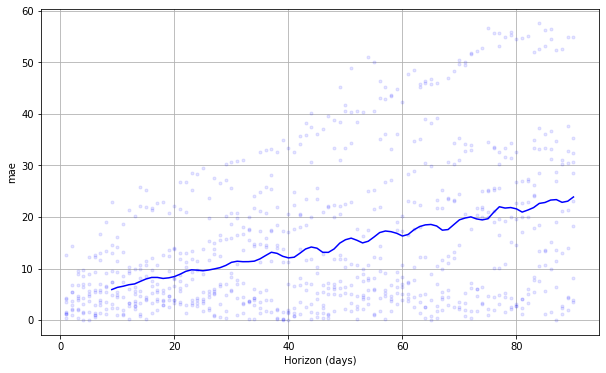

In [80]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

## Interpretation

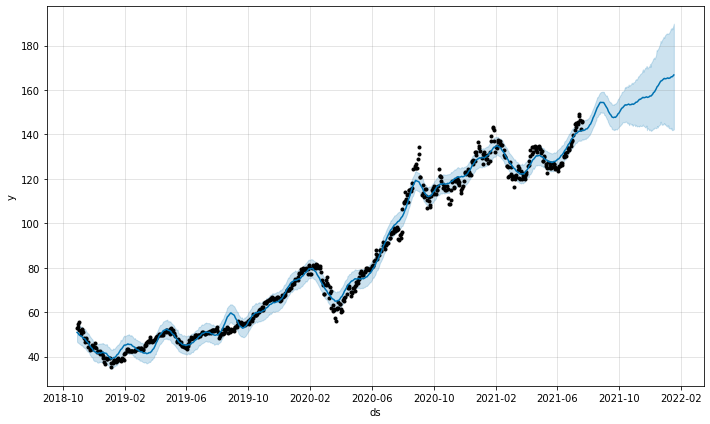

In [81]:
model.plot(future_forecast);

With the information you have, you can already start making decisions. The rest is up to how risk averse are you and what's your goal!

* We can see from the prediction `plot` that we have a point after which the model quickly starts to lose confidence.
* We can also see the same from the errors - as we try to predict further into the future, our accuracy goes down.
* **But** we can see that typically about up to 30-50 days into the future we are getting good results for 1 hour of work! 💪

# Congrats! You now have Python tools for your own predictions! 🔥